## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models.

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

## Exploratory data analysis

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Observe the different feature type present in the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes.

In [ ]:
classes = df['Class'].value_counts()
normal_share = classes[0] / df['Class'].count()*100
fraud_share = classes[1] / df['Class'].count()*100
print("Percentage of non-fraudulent transactions: ", round(normal_share, 2))
print("Percentage of fraudulent transactions: ", round(fraud_share, 2))

Percentage of non-fraudulent transactions:  99.83
Percentage of fraudulent transactions:  0.17


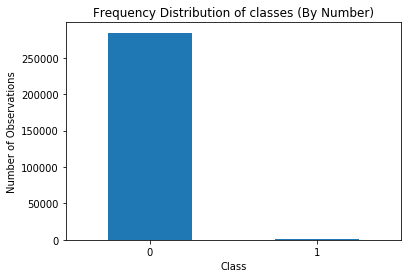

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations.

plt.xlabel("Class")
plt.ylabel("Number of Observations")
classes.plot(kind = 'bar',title = 'Frequency Distribution of classes (By Number)',rot=0)

<function matplotlib.pyplot.show(*args, **kw)>

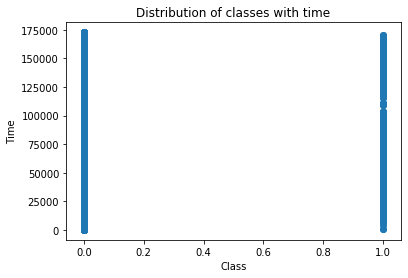

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(df['Class'], df['Time'])
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Distribution of classes with time")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

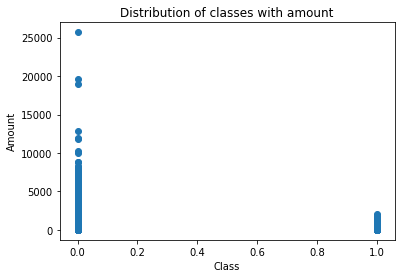

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(df['Class'], df['Amount'])
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Distribution of classes with amount")
plt.show

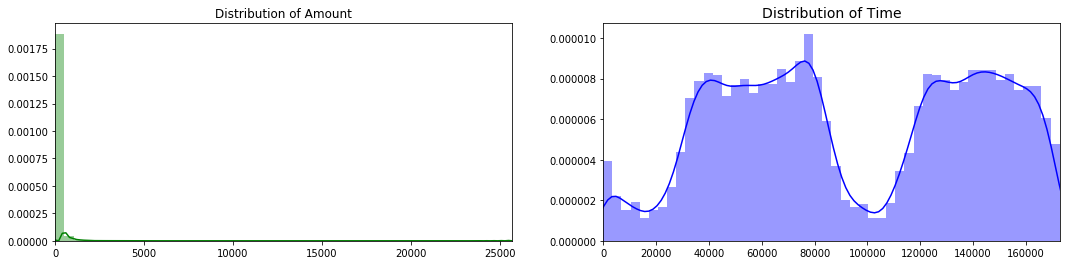

In [ ]:
# We also see the distribution of the Amount and Time.

fig, axs = plt.subplots(1, 2, figsize=(18,4))

val_amount = df['Amount'].values
val_time = df['Time'].values

sns.distplot(val_amount, ax = axs[0], color = 'g')
axs[0].set_title('Distribution of Amount')
axs[0].set_xlim([min(val_amount), max(val_amount)])

sns.distplot(val_time, ax = axs[1], color = 'b')
axs[1].set_title('Distribution of Time', fontsize=14)
axs[1].set_xlim([min(val_time), max(val_time)])

plt.show()

###### As we have principal components given to us we will not be dropping any columns.


### Splitting the data into train & test data

In [ ]:
# Class Variable.

y = df['Class']
x = df.drop(['Class'], axis = 1)

In [ ]:
# Splitting into train and test.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model.

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

Text(0.5, 1.0, 'Distribution of V28')

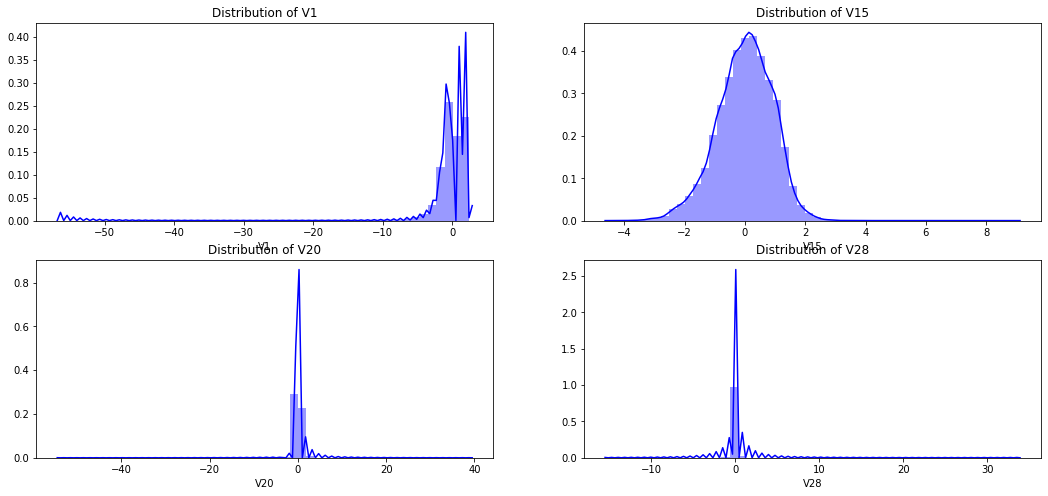

In [ ]:
# Plot the histogram of few variables from the dataset to see the skewness.

fig, axs = plt.subplots(2, 2, figsize=(18,8))

sns.distplot(X_train['V1'], ax = axs[0, 0], color = 'b')
axs[0, 0].set_title('Distribution of V1')

sns.distplot(X_train['V15'], ax = axs[0, 1], color = 'b')
axs[0, 1].set_title('Distribution of V15')

sns.distplot(X_train['V20'], ax = axs[1, 0], color = 'b')
axs[1, 0].set_title('Distribution of V20')

sns.distplot(X_train['V28'], ax = axs[1, 1], color = 'b')
axs[1, 1].set_title('Distribution of V28')

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# Apply power transformer to fit & transform the train & test data and make the variable distribution more gaussian.

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy = False)
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

Text(0.5, 1.0, 'Distribution of V28')

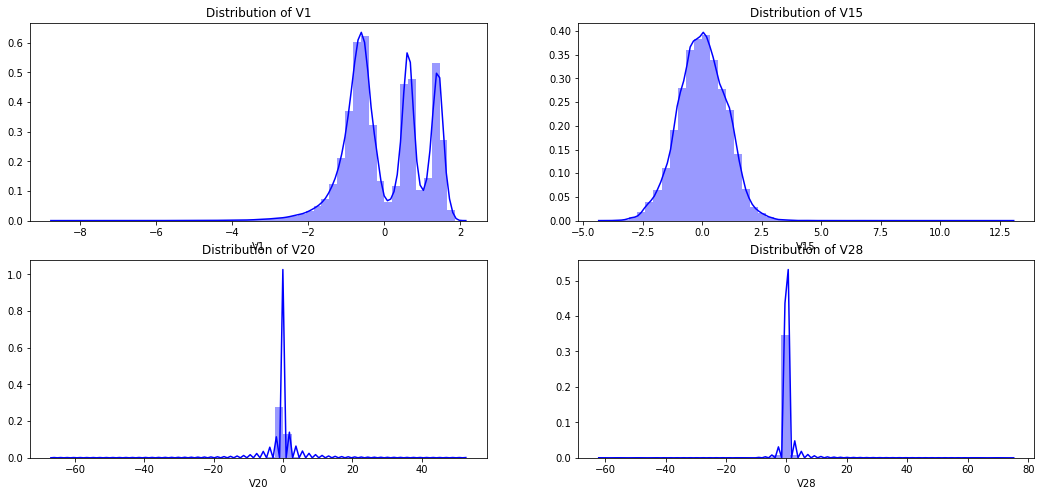

In [ ]:
# Plot the histogram of few variables from the dataset again to see the result of the transformation.

fig, axs = plt.subplots(2, 2, figsize=(18,8))

sns.distplot(X_train['V1'], ax = axs[0, 0], color = 'b')
axs[0, 0].set_title('Distribution of V1')

sns.distplot(X_train['V15'], ax = axs[0, 1], color = 'b')
axs[0, 1].set_title('Distribution of V15')

sns.distplot(X_train['V20'], ax = axs[1, 0], color = 'b')
axs[1, 0].set_title('Distribution of V20')

sns.distplot(X_train['V28'], ax = axs[1, 1], color = 'b')
axs[1, 1].set_title('Distribution of V28')

## Model Building
- Build different models on the imbalanced dataset and see the result.

###### Logistic Regression on imbalanced data set.

In [ ]:
logistic = LogisticRegression()

num_C = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# Perform cross validation.

cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)



In [ ]:
# Hyperparameter tuning.

gsv_log = GridSearchCV(estimator = logistic, cv = cv_num, param_grid = num_C, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
model_imb_log = gsv_log.fit(X_train_pt, y_train)

# Print the optimum value of hyperparameters.

model_imb_log.best_estimator_.get_params()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   39.5s finished


{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predicting on the train and test set.

y_train_pred_imb_log = model_imb_log.predict(X_train_pt)
y_test_pred_imb_log = model_imb_log.predict(X_test_pt)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for Logistic Regression Model on Imbalanced data set for train set:\n")
print(classification_report(y_train_pred_imb_log, y_train))
print("Evaluation metrics for Logistic Regression Model on Imbalanced data set for test set:\n")
print(classification_report(y_test_pred_imb_log, y_test))

Evaluation metrics for Logistic Regression Model on Imbalanced data set for train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199107
           1       0.64      0.89      0.74       257

    accuracy                           1.00    199364
   macro avg       0.82      0.94      0.87    199364
weighted avg       1.00      1.00      1.00    199364

Evaluation metrics for Logistic Regression Model on Imbalanced data set for test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85341
           1       0.65      0.87      0.75       102

    accuracy                           1.00     85443
   macro avg       0.83      0.94      0.87     85443
weighted avg       1.00      1.00      1.00     85443



###### XGBoost model on imbalanced data set.

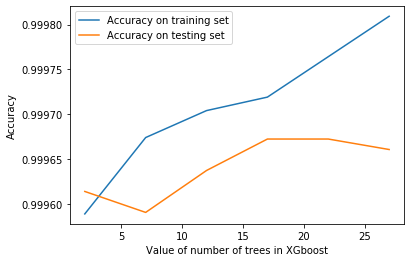

In [ ]:
# Finding the optimum number of trees for XGBoost.

tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_pt, y_train)
    score1.append(xgb.score(X_train_pt, y_train))
    score2.append(xgb.score(X_test_pt, y_test))

%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

We get the optimum number of trees as 17.

In [ ]:
# Hyperparameter tuning and predicting on the train and test set.

model_imb_xgb = XGBClassifier(n_estimators = 17)
model_imb_xgb.fit(X_train_pt, y_train)

y_train_pred_imb_xgb = model_imb_xgb.predict(X_train_pt)
y_test_pred_imb_xgb = model_imb_xgb.predict(X_test_pt)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for XGBoost Model on Imbalanced data set for train set:\n")
print(classification_report(y_train_pred_imb_xgb, y_train))
print("Evaluation metrics for XGBoost Model on Imbalanced data set for test set:\n")
print(classification_report(y_test_pred_imb_xgb, y_test))

Evaluation metrics for XGBoost Model on Imbalanced data set for train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199064
           1       0.84      1.00      0.91       300

    accuracy                           1.00    199364
   macro avg       0.92      1.00      0.96    199364
weighted avg       1.00      1.00      1.00    199364

Evaluation metrics for XGBoost Model on Imbalanced data set for test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85325
           1       0.83      0.96      0.89       118

    accuracy                           1.00     85443
   macro avg       0.92      0.98      0.94     85443
weighted avg       1.00      1.00      1.00     85443



We proceed with the XGBoost model as that performs better than the Logistic Regression model on the Imbalanced data set.----

In [ ]:
# Initialise the model with optimum hyperparameters.

clf = XGBClassifier(n_estimators = 17)

# Fit on the imbalanced dataset.

clf.fit(X_train_pt, y_train)

# Making predictions on the test set.

y_test_pred_imb_final = clf.predict(X_test_pt)

# Print the evaluation score on the X_test by choosing the best evaluation metric.

print("Performance metrics of the XGBoost model on the imbalanced data set are: \n")
print("Precision: ", round(precision_score(y_test_pred_imb_final, y_test), 2))
print("Recall: ", round(recall_score(y_test_pred_imb_final, y_test), 2))
print("F1-Score: ", round(f1_score(y_test_pred_imb_final, y_test), 2))

Performance metrics of the XGBoost model on the imbalanced data set are: 

Precision:  0.83
Recall:  0.96
F1-Score:  0.89


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset.
- But it will help us in understanding if the dataset is not PCA transformed.

Top var = 18
2nd Top var = 15
3rd Top var = 11


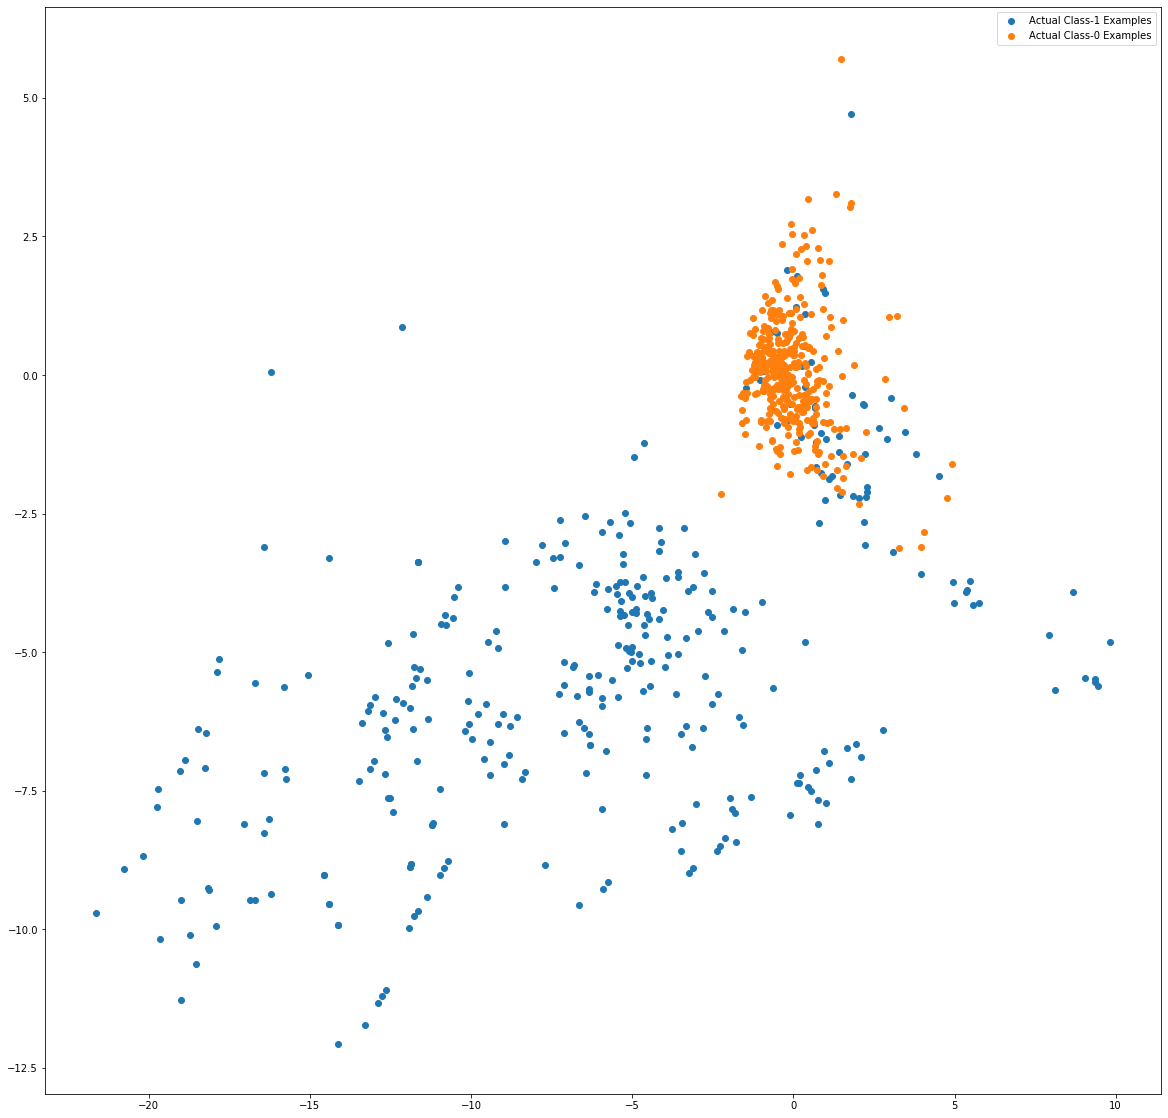

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-18 and Index-15 seems to be the top 2 variables.

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Performing class balancing with:
- SMOTE
- ADASYN

## Model Building
- Build Logistic Regression and XGBoost model on the balanced dataset and see the result.

### Print the class distribution after applying SMOTE.

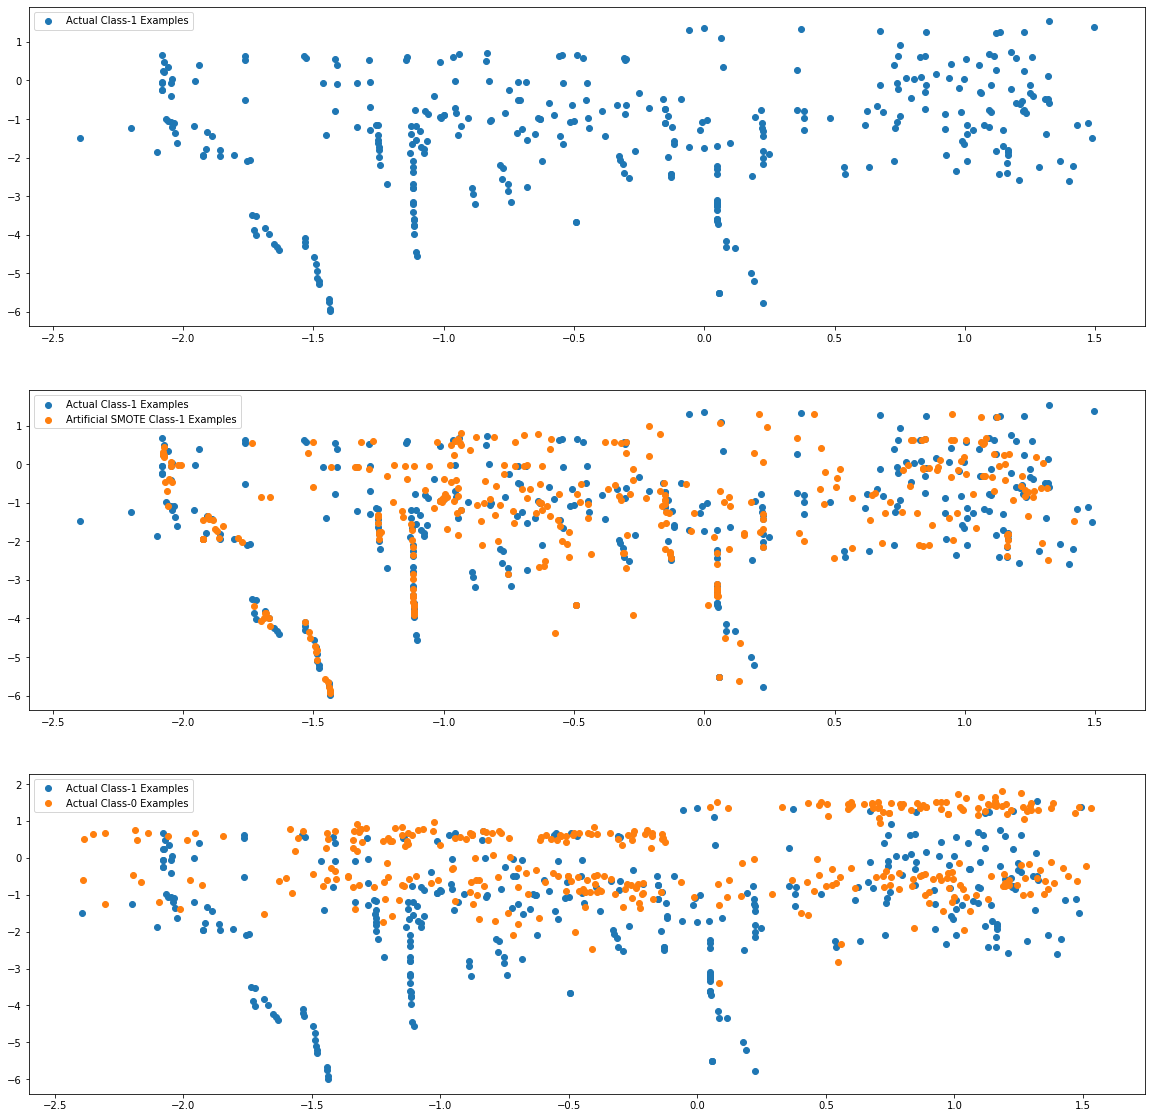

In [ ]:
# Balance classes on train and test set using SMOTE.

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test_pt, y_test)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train_pt[np.where(y_train == 1.0)]
X_train_0 = X_train_pt[np.where(y_train == 0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

###### Logistic Regression model after performing SMOTE.

In [ ]:
# Perform cross validation.

num_C = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Perform hyperparameter tuning.

gsv_smote_log = GridSearchCV(estimator = logistic, cv = cv_num, param_grid = num_C, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
model_smote_log = gsv_log.fit(X_train_smote, y_train_smote)

# Print the optimum value of hyperparameters.

model_smote_log.best_estimator_.get_params()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   51.9s finished


{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predicting on the train and test set.

y_train_pred_smote_log = model_smote_log.predict(X_train_smote)
y_test_pred_smote_log = model_smote_log.predict(X_test_smote)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for Logistic Regression Model on data set balance using SMOTE for train set:\n")
print(classification_report(y_train_pred_smote_log, y_train_smote))
print("Evaluation metrics for Logistic Regression Model on data set balanced using SMOTE for test set:\n")
print(classification_report(y_test_pred_smote_log, y_test_smote))

Evaluation metrics for Logistic Regression Model on data set balance using SMOTE for train set:

              precision    recall  f1-score   support

           0       0.97      0.92      0.95    208999
           1       0.92      0.97      0.94    189017

    accuracy                           0.95    398016
   macro avg       0.95      0.95      0.95    398016
weighted avg       0.95      0.95      0.95    398016

Evaluation metrics for Logistic Regression Model on data set balanced using SMOTE for test set:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     88472
           1       0.93      0.97      0.95     82142

    accuracy                           0.95    170614
   macro avg       0.95      0.95      0.95    170614
weighted avg       0.95      0.95      0.95    170614



###### XGBoost model after performing SMOTE.

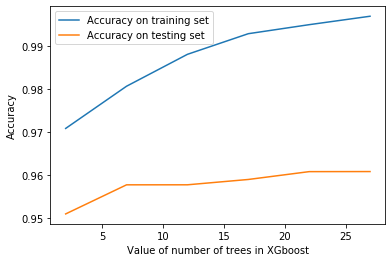

In [ ]:
# Finding the optimum number of trees for XGBoost.

tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_smote, y_train_smote)
    score1.append(xgb.score(X_train_smote, y_train_smote))
    score2.append(xgb.score(X_test_smote, y_test_smote))

%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

We get the optimum number of trees as 25.

In [ ]:
# Hyperparameter tuning and predicting on the train and test set.

model_smote_xgb = XGBClassifier(n_estimators = 25)
model_smote_xgb.fit(X_train_smote, y_train_smote)

y_train_pred_smote_xgb = model_smote_xgb.predict(X_train_smote)
y_test_pred_smote_xgb = model_smote_xgb.predict(X_test_smote)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for XGBoost Model on data set balanced using SMOTE for train set:\n")
print(classification_report(y_train_pred_smote_xgb, y_train_smote))
print("Evaluation metrics for XGBoost Model on data set balanced using SMOTE for test set:\n")
print(classification_report(y_test_pred_smote_xgb, y_test_smote))

Evaluation metrics for XGBoost Model on data set balanced using SMOTE for train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199004
           1       1.00      1.00      1.00    199012

    accuracy                           1.00    398016
   macro avg       1.00      1.00      1.00    398016
weighted avg       1.00      1.00      1.00    398016

Evaluation metrics for XGBoost Model on data set balanced using SMOTE for test set:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     91257
           1       0.93      1.00      0.96     79357

    accuracy                           0.96    170614
   macro avg       0.96      0.96      0.96    170614
weighted avg       0.96      0.96      0.96    170614



### Print the class distribution after applying ADASYN

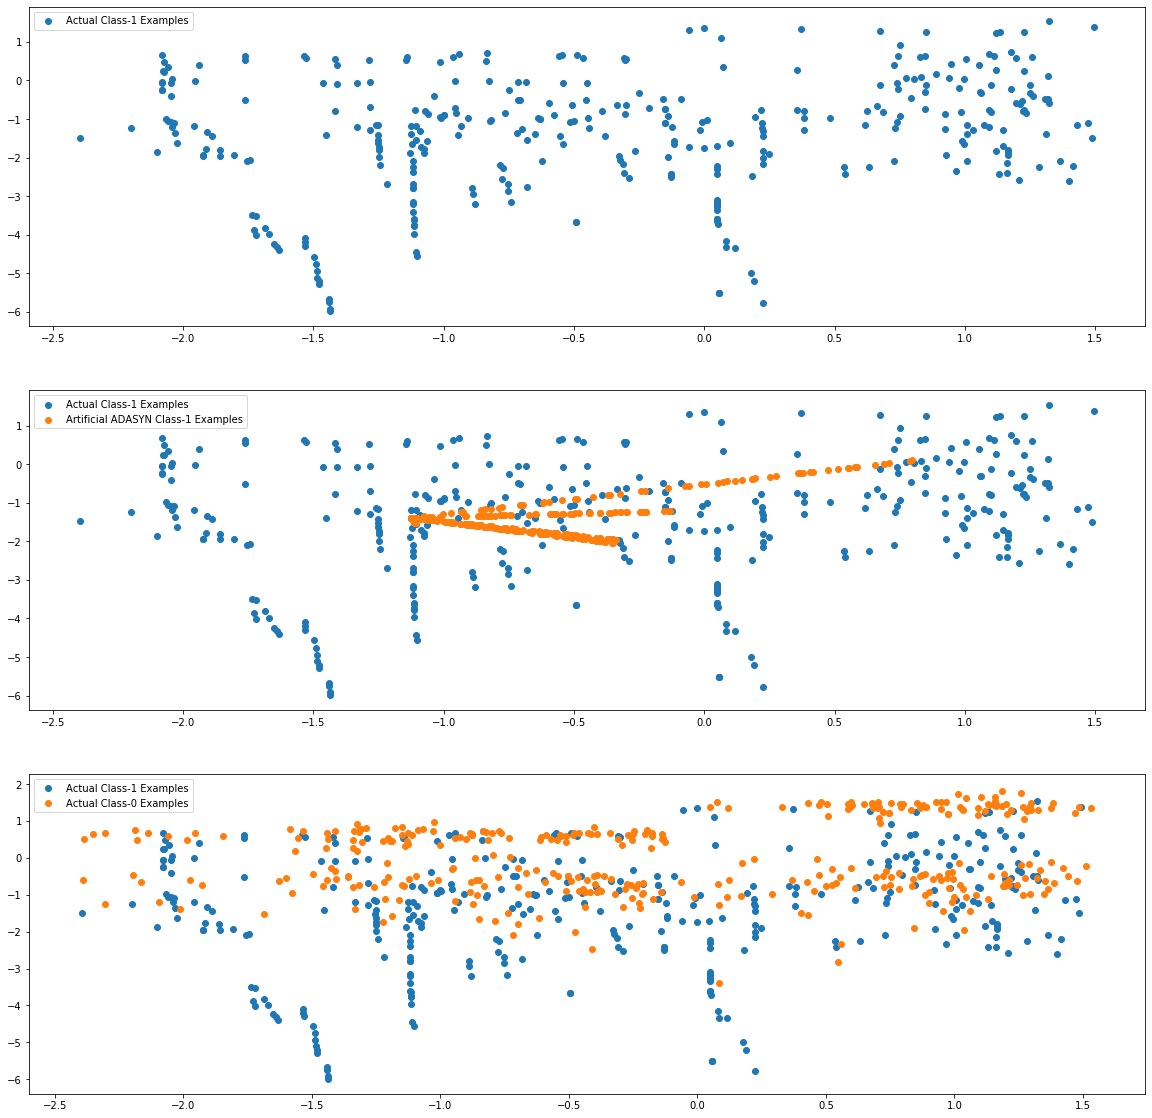

In [ ]:
# Balance classes on train and test set using ADASYN.

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)
X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test_pt, y_test)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train_pt[np.where(y_train == 1.0)]
X_train_0 = X_train_pt[np.where(y_train == 0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

###### Logistic Regression model after performing ADASYN.

In [ ]:
# Perform cross validation.

num_C = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Perform hyperparameter tuning.

gsv_adasyn_log = GridSearchCV(estimator = logistic, cv = cv_num, param_grid = num_C, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
model_adasyn_log = gsv_log.fit(X_train_adasyn, y_train_adasyn)

# Print the optimum value of hyperparameters.

model_adasyn_log.best_estimator_.get_params()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   56.3s finished


{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predicting on the train and test set.

y_train_pred_adasyn_log = model_adasyn_log.predict(X_train_adasyn)
y_test_pred_adasyn_log = model_adasyn_log.predict(X_test_adasyn)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for Logistic Regression Model on data set balanced using ADASYN for train set:\n")
print(classification_report(y_train_pred_adasyn_log, y_train_adasyn))
print("Evaluation metrics for Logistic Regression Model on data set balanced using ADASYN for test set:\n")
print(classification_report(y_test_pred_adasyn_log, y_test_adasyn))

Evaluation metrics for Logistic Regression Model on data set balanced using ADASYN for train set:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89    203183
           1       0.88      0.90      0.89    194847

    accuracy                           0.89    398030
   macro avg       0.89      0.89      0.89    398030
weighted avg       0.89      0.89      0.89    398030

Evaluation metrics for Logistic Regression Model on data set balanced using ADASYN for test set:

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     88505
           1       0.86      0.90      0.88     82088

    accuracy                           0.88    170593
   macro avg       0.88      0.88      0.88    170593
weighted avg       0.88      0.88      0.88    170593



###### XGBoost model after performing ADASYN.

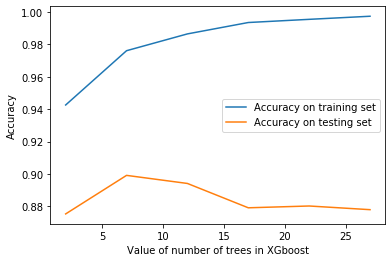

In [ ]:
# Finding the optimum number of trees for XGBoost.

tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_adasyn, y_train_adasyn)
    score1.append(xgb.score(X_train_adasyn, y_train_adasyn))
    score2.append(xgb.score(X_test_adasyn, y_test_adasyn))

%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

We get the optimum number of trees as 7.

In [ ]:
# Hyperparameter tuning and predicting on the train and test set.

model_adasyn_xgb = XGBClassifier(n_estimators = 7)
model_adasyn_xgb.fit(X_train_adasyn, y_train_adasyn)

y_train_pred_adasyn_xgb = model_adasyn_xgb.predict(X_train_adasyn)
y_test_pred_adasyn_xgb = model_adasyn_xgb.predict(X_test_adasyn)

In [ ]:
# Print the evaluation result by choosing a evaluation metric.

print("Evaluation metrics for XGBoost Model on data set balanced using ADASYN for train set:\n")
print(classification_report(y_train_pred_adasyn_xgb, y_train_adasyn))
print("Evaluation metrics for XGBoost Model on data set balanced using ADASYN for test set:\n")
print(classification_report(y_test_pred_adasyn_xgb, y_test_adasyn))

Evaluation metrics for XGBoost Model on data set balanced using ADASYN for train set:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    197198
           1       0.98      0.97      0.98    200832

    accuracy                           0.98    398030
   macro avg       0.98      0.98      0.98    398030
weighted avg       0.98      0.98      0.98    398030

Evaluation metrics for XGBoost Model on data set balanced using ADASYN for test set:

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     97473
           1       0.83      0.97      0.89     73120

    accuracy                           0.90    170593
   macro avg       0.90      0.91      0.90    170593
weighted avg       0.91      0.90      0.90    170593



#### We can see that the XGBoost model built on the data set after balancing it using SMOTE gives the best result.

So we build the final model and make predictions and see the performance metrics.

In [ ]:
# Perform the best oversampling method on X_train & y_train and build the best performing model.
# Initialise the model with optimum hyperparameters.

clf = XGBClassifier(n_estimators = 25)

# Fit on the balanced dataset.

clf.fit(X_train_smote, y_train_smote)

# Making predictions on the test set.

y_test_pred_final = clf.predict(X_test_smote)

# Print the evaluation score on the X_test by choosing the best evaluation metric.

print("Performance metrics of the XGBoost model on the data set balanced using SMOTE are: \n")
print("Precision: ", round(precision_score(y_test_pred_final, y_test_smote), 2))
print("Recall: ", round(recall_score(y_test_pred_final, y_test_smote), 2))
print("F1-Score: ", round(f1_score(y_test_pred_final, y_test_smote), 2))

Performance metrics of the XGBoost model on the data set balanced using SMOTE are: 

Precision:  0.93
Recall:  1.0
F1-Score:  0.96


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 5
3rd Top var = 9


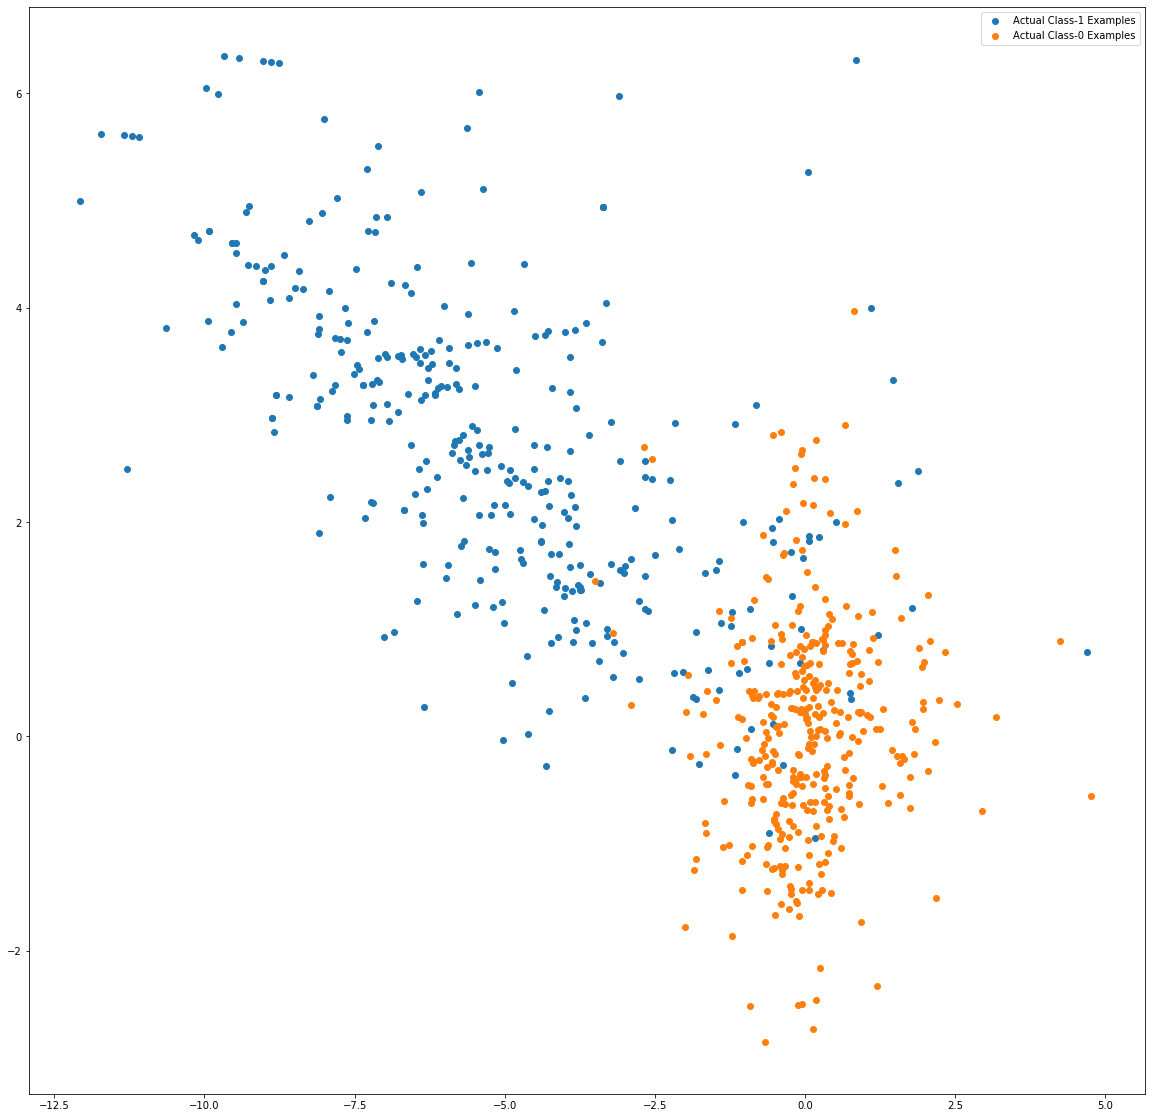

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-15 and Index-5 seems to be the top 2 variables.

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_smote[np.where(y_train==1.0)]
X_train_0 = X_train_smote[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()